In [17]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.stats  as stat

In [15]:
data=load_boston()

In [16]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["Medv"]=data.target

In [4]:
x=df.drop("Medv",axis=1)
y=df["Medv"]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
import seaborn as sns
plt.figure(figsize=(10,10))
corr=x_train.corr()
#sns.heatmap(corr,annot=True,cmap=plt.cm)

<Figure size 720x720 with 0 Axes>

In [9]:
def corelations(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc [i,j])>threshold:
                 colname=corr_matrix.columns[i]
                 col_corr.add(colname)
    return col_corr

In [10]:
corr_features=corelations(x_train,0.7)
len(set(corr_features))

4

In [11]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


## Information Gain

In [ ]:
df=pd.read_csv('')
df.head()

In [ ]:
df['Wine'].unique()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'],axis=1))
x_train.head()

In [ ]:
## higher the value the best feature
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

In [ ]:
## select top 10 Features
from sklearn.feature_selection import SelectKBest
mutual_info.sort_values(ascending=False).plt.bar(figsize=(10,20))
select_five_cols=SelectKBest(mutual_info_classif,k=5)
select_five_cols.fit(x_train,y_train)
x_train.columns[select_five_cols.get_support()]

## Robust Scaler

In [9]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
db_robust=pd.DataFrame(scaler.fit_transform(x_train))
db_robust.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.450778,0.0,1.013688,0.0,0.479777,-1.591090,0.423057,-0.597749,-0.05,0.323077,0.750000,0.269706,2.329076
1,-0.048860,1.0,-0.121673,0.0,-0.412831,0.428856,-0.427174,0.236165,-0.10,-0.225641,-0.178571,0.170890,-0.343601
2,0.097391,0.0,1.013688,0.0,0.479777,0.158910,0.386001,-0.371847,-0.05,0.323077,0.750000,0.156119,0.581017
3,-0.065341,3.5,-0.480608,0.0,-0.769874,0.172207,-1.221822,1.552033,0.00,0.120513,-1.535714,-1.190118,-0.620085
4,-0.055992,0.0,1.299620,0.0,0.239888,-0.338431,0.276891,-0.379856,-0.15,-0.315385,0.000000,-0.688399,0.678187


## Guassian Transformation

In [ ]:
## logarithmic 
## reciprocal
## square root
## exponential
## boxcox

In [14]:
import pylab

In [13]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    #plt.subplots(1,2,1)
    df[feature].hist()
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

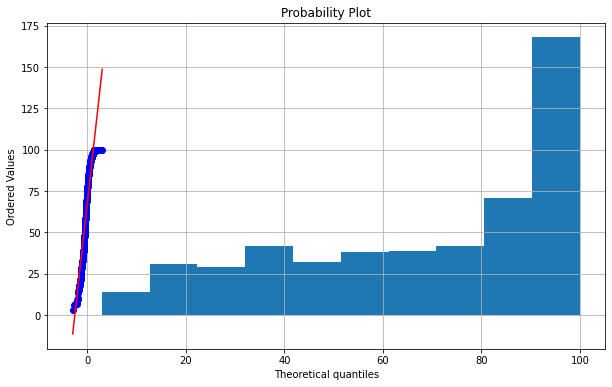

In [41]:
plot_data(df,'AGE')

## Standardization

In [ ]:
# When the features of input data set have large differences between their range or when they're measured in different measurements
# ## we bring all the variables or features to a similar scale, standardizaton means centering the     variable at zero z=(x-x.mean)/std

In [28]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
scaled=sd.fit_transform(x_train)

In [29]:
x_test=sd.transform(x_test)

## MinMax scaling is used in Deeplearning

In [33]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_min_max=pd.DataFrame(min_max.fit_transform(df))
df_min_max.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.879193,0.767948,0.559595
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.933063,0.865322,0.725291
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.860849,0.736852,0.512176
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.779439,0.610413,0.345138
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.827003,0.682064,0.434825


## Logarithmic Transformation

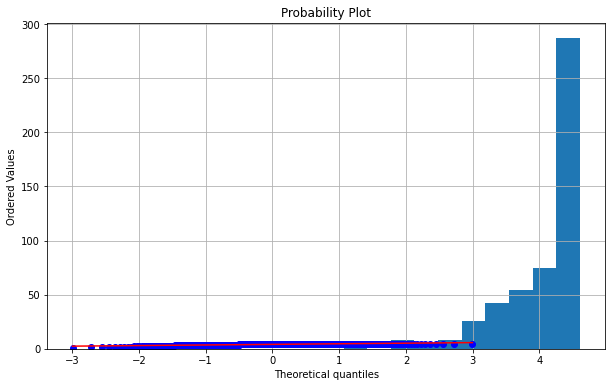

In [42]:
import numpy as np
df['Age_log']=np.log(df['AGE'])
plot_data(df,'Age_log')

## Squre root transformation

In [24]:
df['Age_square']=df.AGE**(1/2)
print(df['Age_square'])

0      8.074652
1      8.882567
2      7.816649
3      6.767570
4      7.362065
         ...   
501    8.312641
502    8.757854
503    9.539392
504    9.449868
505    8.988882
Name: Age_square, Length: 506, dtype: float64


## Exponential Transformation

In [25]:
df['Age_square']=df.AGE**(1/1/2)
print(df['Age_square'])

0      8.074652
1      8.882567
2      7.816649
3      6.767570
4      7.362065
         ...   
501    8.312641
502    8.757854
503    9.539392
504    9.449868
505    8.988882
Name: Age_square, Length: 506, dtype: float64


## Box cox Transformation

In [22]:
## Follow the formulae
df['Age_box'],parameters=stat.boxcox(df['AGE'])
print(parameters)

1.3414473519532712


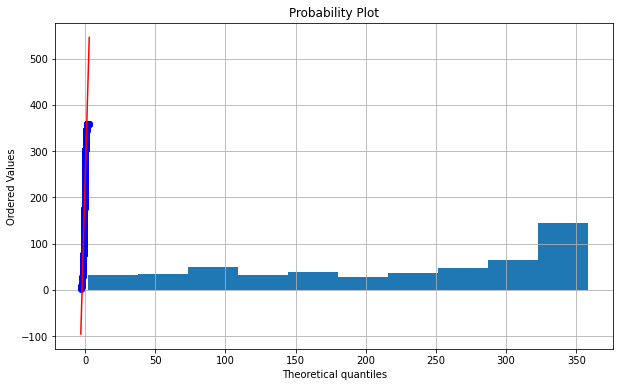

In [23]:
plot_data(df,'Age_box')

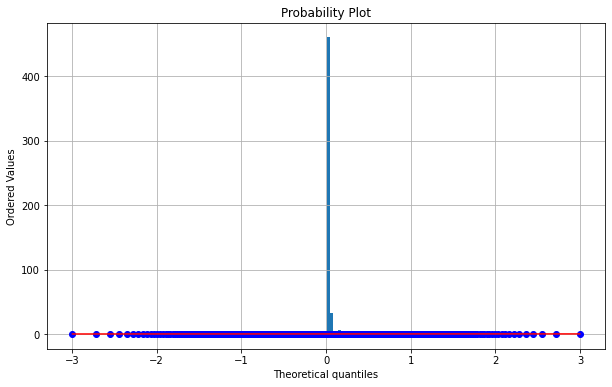

In [19]:
## Reciprocal
df['AGE _reci']=1/df.AGE
plot_data(df,'AGE _reci')

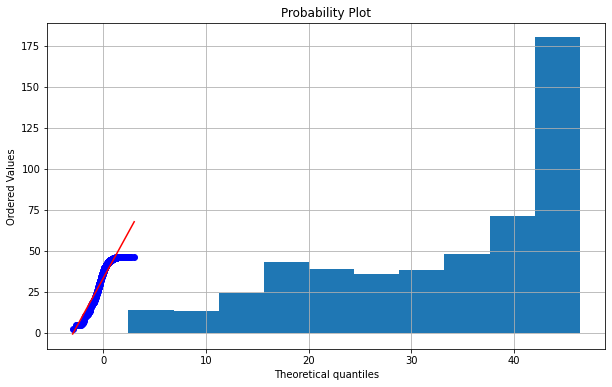

In [21]:
## Exponential Transformation
df['Age_Expo']=df.AGE**(1/1.2)
plot_data(df,'Age_Expo')

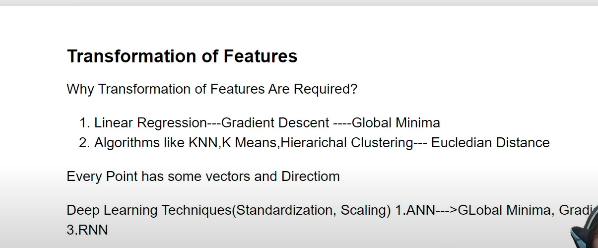

In [2]:
from PIL import Image
 
# creating a object
im = Image.open(r"C:/Users/00824732/Desktop/new_one.PNG")
im